---
title: "My Document"
execute:
  echo: false
  cache: true
format:
  html:
    html-math-method: katex
    embed-resources: true
    self-contained-math: true
    toc: true
  docx:
    df-print: tibble
  pdf:
    toc: true
---

# Weave Test

In [1]:
using Handcalcs, BridgeCalcsUS
using Latexify, LaTeXStrings
using Unitful, UnitfulLatexify
using Format

In [2]:
import TestHandcalcFunctions: calc_Ix, calc_Iy

In [7]:
const inch = u"inch"
const ft = u"ft";

In [4]:
set_default(fmt = x->format(round(x, digits=4)));

## Rectangle Properties

In [7]:
@handcalcs begin
    b = 5; "base";
    h = 12; "height";
end

L"$\begin{aligned}
b &= 5\;\text{  }(\text{base})
\\[10pt]
h &= 12\;\text{  }(\text{height})
\end{aligned}$"

### Calculate Ix

In [5]:
@handcalcs begin
    I_x = b*h^3/12
end

L"$\begin{aligned}
I_{x} &= \frac{b \cdot h^{3}}{12} = \frac{5 \cdot 12^{3}}{12} = 720.0
\end{aligned}$"

### Calculate Area

In [6]:
@handcalcs begin
    area = b*h
end

L"$\begin{aligned}
area &= b \cdot h = 5 \cdot 12 = 60
\end{aligned}$"

In [5]:
@handfunc P_e = A6_9_4_1_2d1(29000, 19.7, 1.0, 408, 2.12) 

L"$\begin{aligned}
P_{e} &= \frac{\pi^{2} \cdot E}{\left( \frac{K \cdot l}{r_{s}} \right)^{2}} \cdot A_{g} = \frac{3.1416^{2} \cdot 29000}{\left( \frac{1 \cdot 408}{2.12} \right)^{2}} \cdot 19.7 = 152.2353\;\text{  }(\text{AASHTO 6.9.4.1.2-1})
\end{aligned}$"

## Example Plot

In [7]:
using Plots

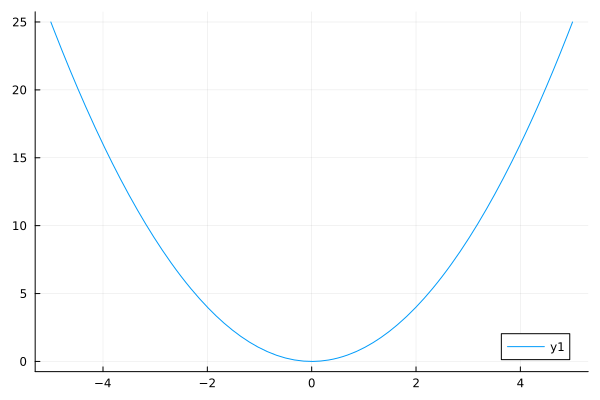

In [8]:
#| label: fig-parametric
#| fig-cap: "Parametric Plots"
f(x) = x^2
plot(f)

In [9]:
a = [1;2;3]
b = [4;5;7]
@handcalcs begin
c = if h<6
        a + b
    else
        a - b
    end
end

L"$\begin{aligned}
c &= \begin{cases}
a + b & \text{if } \left( h < 6 \right)\\
a - b & \text{otherwise}
\end{cases} = \begin{cases}
\left[
\begin{array}{c}
1 \\
2 \\
3 \\
\end{array}
\right] + \left[
\begin{array}{c}
4 \\
5 \\
7 \\
\end{array}
\right] & \text{if } \left( 12 < 6 \right)\\
\left[
\begin{array}{c}
1 \\
2 \\
3 \\
\end{array}
\right] - \left[
\begin{array}{c}
4 \\
5 \\
7 \\
\end{array}
\right] & \text{otherwise}
\end{cases} = \left[
\begin{array}{c}
-3 \\
-3 \\
-4 \\
\end{array}
\right]
\end{aligned}$"

In [11]:
using Tidier, RDatasets

## Large Dataset

In [12]:
ofp = dataset("Ecdat", "OFP")

Row,OFP,OFNP,OPP,OPNP,EMR,Hosp,NumChron,AdlDiff,Age,Black,Sex,Married,School,FamInc,Employed,Privins,Medicaid,Region,Hlth
,Int32,Int32,Int32,Int32,Int32,Int32,Int32,Int32,Float64,Cat…,Cat…,Cat…,Int32,Float64,Cat…,Cat…,Cat…,Cat…,Cat…
1,5,0,0,0,0,1,2,0,6.9,yes,male,yes,6,2.881,yes,yes,no,other,other
2,1,0,2,0,2,0,2,0,7.4,no,female,yes,10,2.7478,no,yes,no,other,other
3,13,0,0,0,3,3,4,1,6.6,yes,female,no,10,0.6532,no,no,yes,other,poor
4,16,0,5,0,1,1,2,1,7.6,no,male,yes,3,0.6588,no,yes,no,other,poor
5,3,0,0,0,0,0,2,1,7.9,no,female,yes,6,0.6588,no,yes,no,other,other
6,17,0,0,0,0,0,5,1,6.6,no,female,no,7,0.3301,no,no,yes,other,poor
7,9,0,0,0,0,0,0,0,7.5,no,female,no,8,0.828,no,yes,no,midwest,other
8,3,0,0,0,0,0,0,0,8.7,no,female,no,8,3.0456,no,yes,no,midwest,other
9,1,0,0,0,0,0,0,0,7.3,no,female,no,8,3.0456,no,yes,no,midwest,other


## Small Dataset

In [13]:
ofp = @clean_names(ofp)
ofp_mean = @chain ofp begin
   @group_by(region)
   @summarize(mean_age = mean(age*10))
end

Row,region,mean_age
,Cat…,Float64
1,other,73.987
2,midwest,74.0769
3,noreast,73.9343
4,west,74.1165


In [14]:
using PrettyTables

In [15]:
pretty_table(ofp_mean)

┌─────────────────────────────────┬──────────┐
│                          region │ mean_age │
│ CategoricalValue{String, UInt8} │  Float64 │
├─────────────────────────────────┼──────────┤
│                           other │   73.987 │
│                         midwest │  74.0769 │
│                         noreast │  73.9343 │
│                            west │  74.1165 │
└─────────────────────────────────┴──────────┘
